#HW1 - Data Exploration and Preparation

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from sklearn.model_selection import train_test_split
params = {'xtick.labelsize': 18,
'ytick.labelsize': 18,
'axes.titlesize' : 22,
'axes.labelsize' : 20,
'legend.fontsize': 18,
'legend.title_fontsize': 22,
'figure.titlesize': 24 }
pylab.rcParams.update(params)

## Loading the dataset

In [29]:
from prepare import prepare_data

train, test = pd.read_csv("./train_df_prepared.csv"), pd.read_csv("./test_df_prepared.csv")

In [30]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


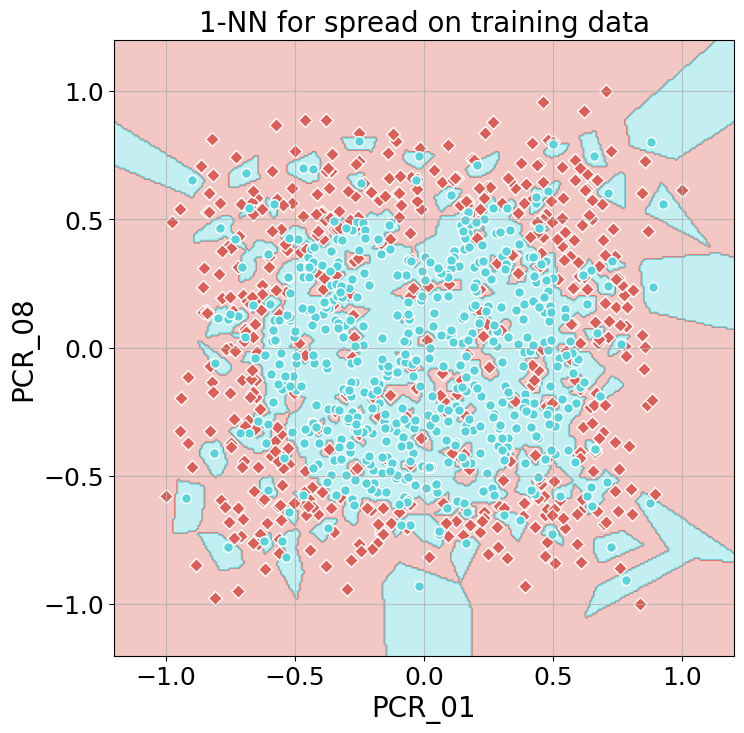

train data accuracy:
1.0


C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


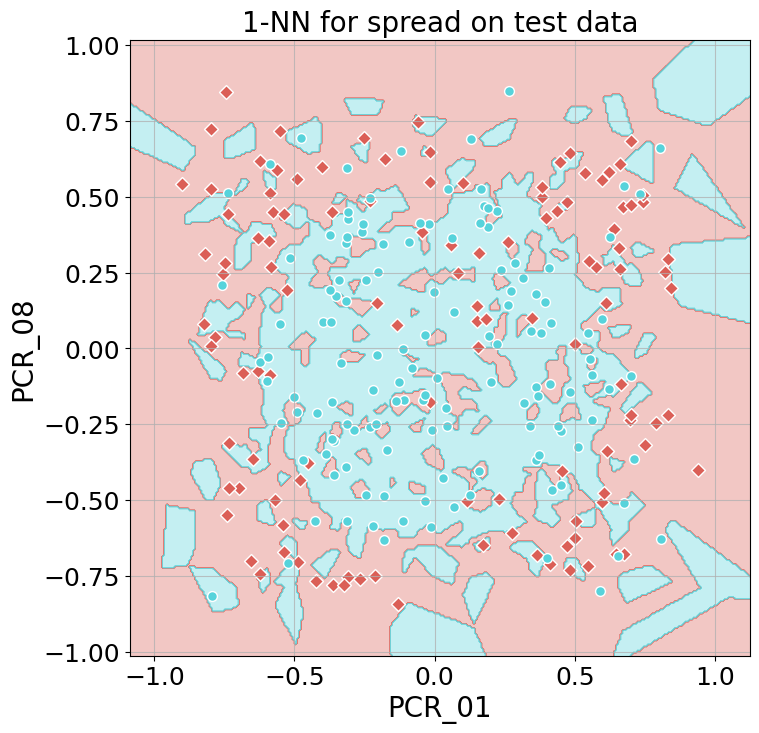

train data accuracy:
0.708


In [31]:
#part 1
from sklearn.neighbors import KNeighborsClassifier

#task
pcr18_train = pd.DataFrame(train, columns=['PCR_01', 'PCR_08'])
pcr18_test = pd.DataFrame(test, columns=['PCR_01', 'PCR_08'])
spread_train = pd.DataFrame(train, columns=['spread'])
spread_test = pd.DataFrame(test, columns=['spread'])

#Q1
oneNN = KNeighborsClassifier(n_neighbors=1)
oneNN.fit(X=pcr18_train, y=spread_train)

visualize_clf(oneNN, pcr18_train, spread_train, '1-NN for spread on training data', 'PCR_01', 'PCR_08')
print("train data accuracy:")
print(oneNN.score(X=pcr18_train, y=spread_train))
visualize_clf(oneNN, pcr18_test, spread_test, '1-NN for spread on test data', 'PCR_01', 'PCR_08')
print("train data accuracy:")
print(oneNN.score(X=pcr18_test, y=spread_test))


In [32]:
#Q2
from sklearn.model_selection import cross_validate

test_mean_list = []
train_mean_list = []
for k in list(range(1,20,2))+list(range(20,695,65)):
    kNN = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(kNN, pcr18_train, spread_train['spread'], cv=8, return_train_score=True)
    
    test_mean = cv_results['test_score'].mean()
    train_mean = cv_results['train_score'].mean()
    
    test_mean_list.append(test_mean)
    train_mean_list.append(train_mean)




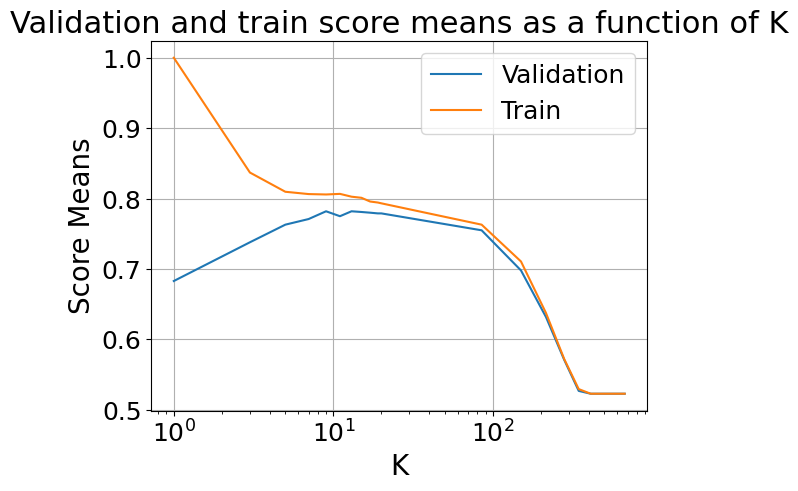

In [33]:
plt.semilogx(list(range(1,20,2))+list(range(20,695,65)), test_mean_list, label='Validation')
plt.semilogx(list(range(1,20,2))+list(range(20,695,65)), train_mean_list, label='Train')
plt.title('Validation and train score means as a function of K')
plt.xlabel('K')
plt.ylabel('Score Means')
plt.grid()
plt.legend()
plt.show()

C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


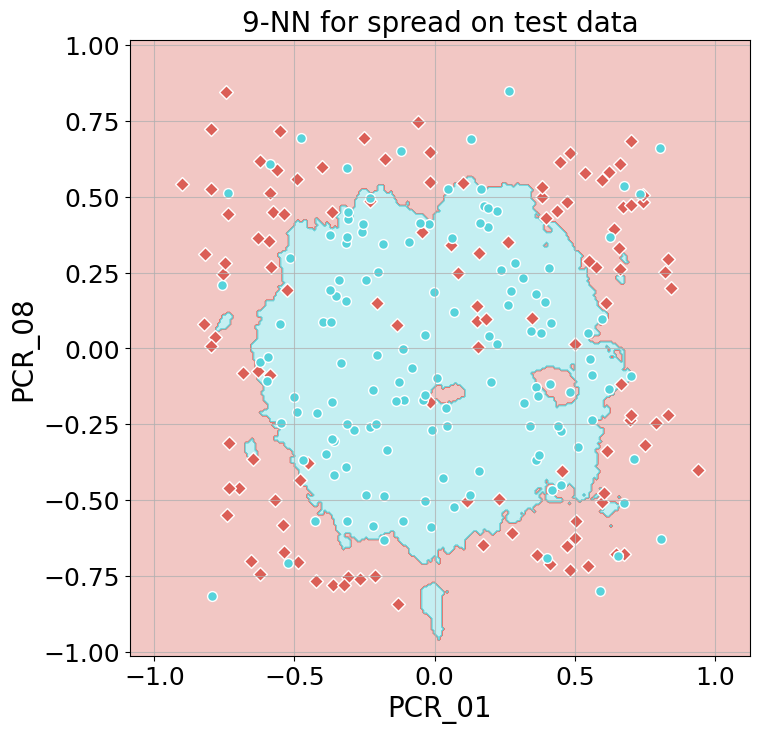

test data accuracy:
0.8


In [34]:
#Q3
kNN = KNeighborsClassifier(n_neighbors=9)
kNN.fit(X=pcr18_train, y=spread_train)

visualize_clf(kNN, pcr18_test, spread_test, '9-NN for spread on test data', 'PCR_01', 'PCR_08')
print("test data accuracy:")
print(kNN.score(X=pcr18_test, y=spread_test))

Training Accuracy: 0.676


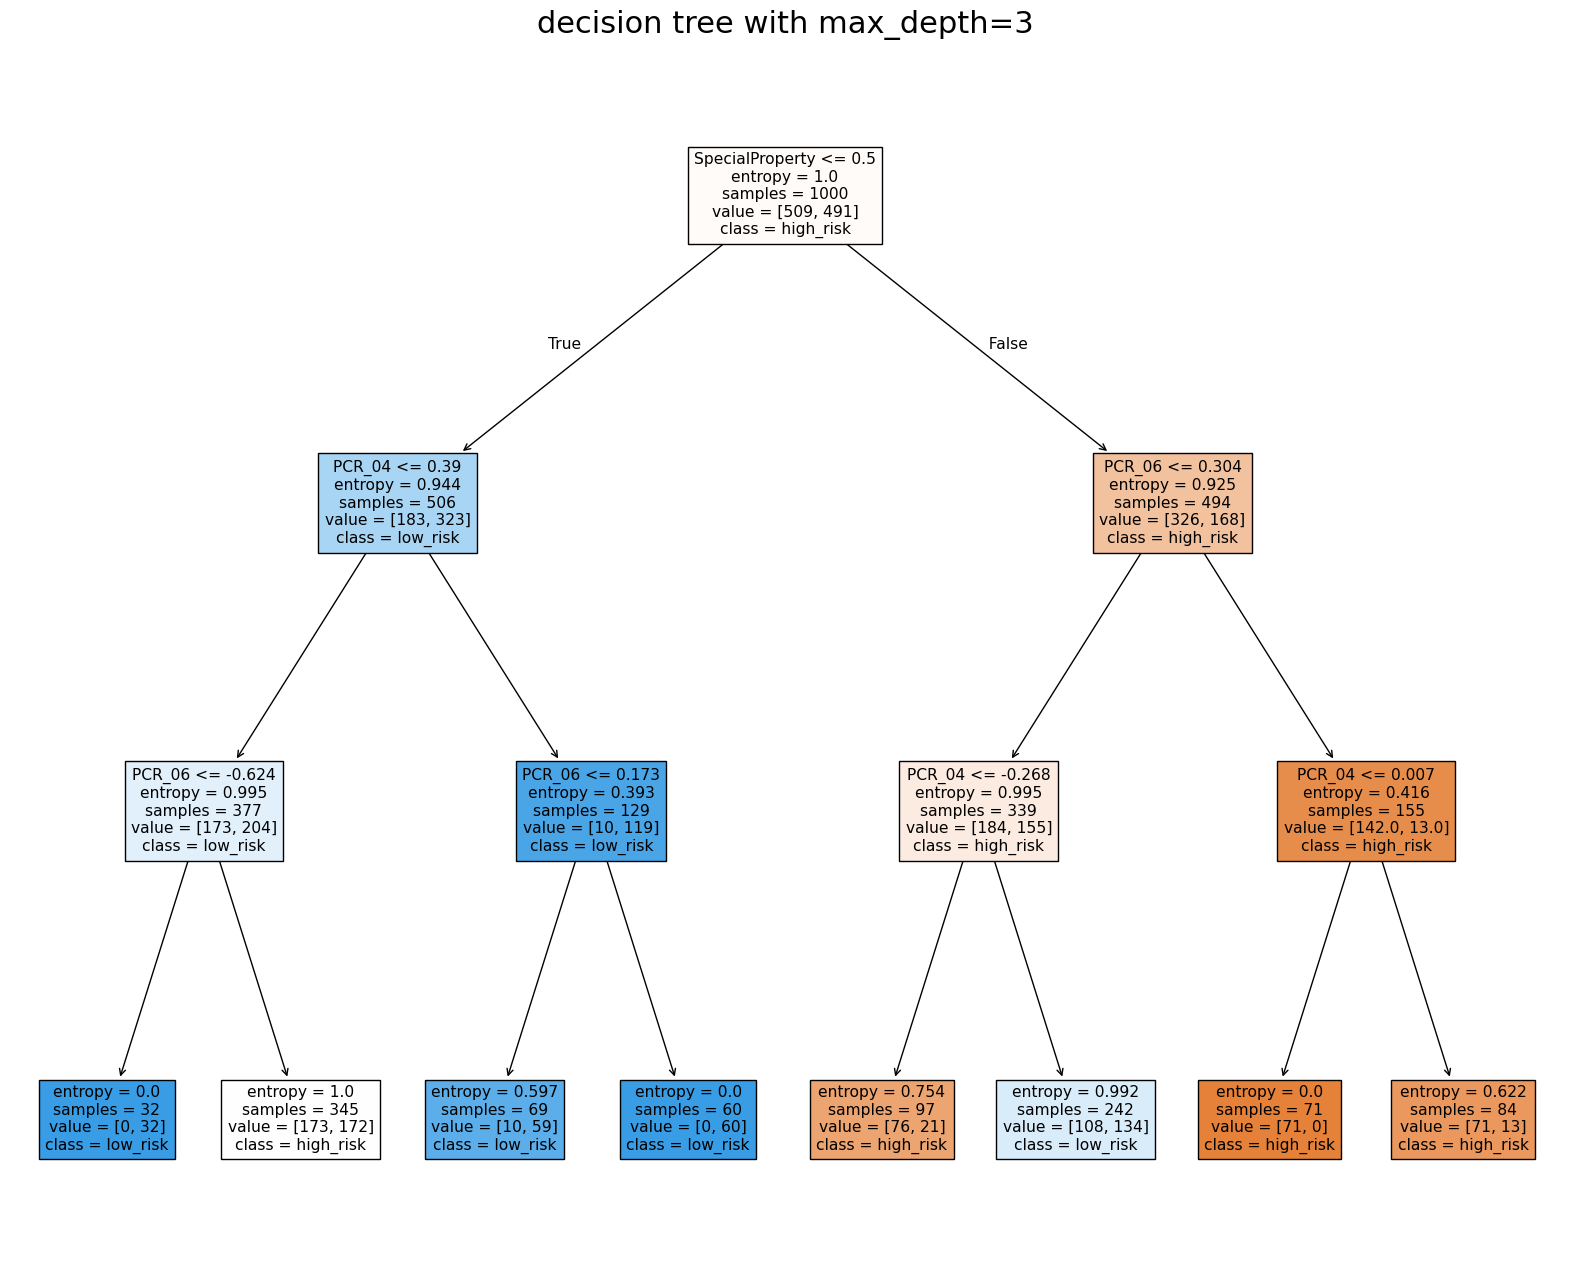

In [35]:
#part 2
#Q5

from sklearn.tree import DecisionTreeClassifier , plot_tree


##split 
train["SpecialProperty"] = train["blood_type"].isin(["O+", "B+"])
test["SpecialProperty"] = test["blood_type"].isin(["O+", "B+"])



X = train[['PCR_04', 'PCR_06', 'SpecialProperty']]  # Features
Y = train['risk']  # Target


DT = DecisionTreeClassifier(max_depth= 3 , criterion="entropy")
DT.fit(X, Y)


training_accuracy = DT.score(X, Y)
print("Training Accuracy:", training_accuracy)


plt.figure(figsize=(20, 16))
plot_tree(DT, filled=True, feature_names=X.columns, class_names=['high_risk', 'low_risk'])
plt.title('decision tree with max_depth=3', fontsize=22)
plt.show()

C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found (with 5-fold cross-validation):  {'max_depth': 8, 'min_samples_leaf': 11}
Best validation accuracy with 5-fold CV:  0.787


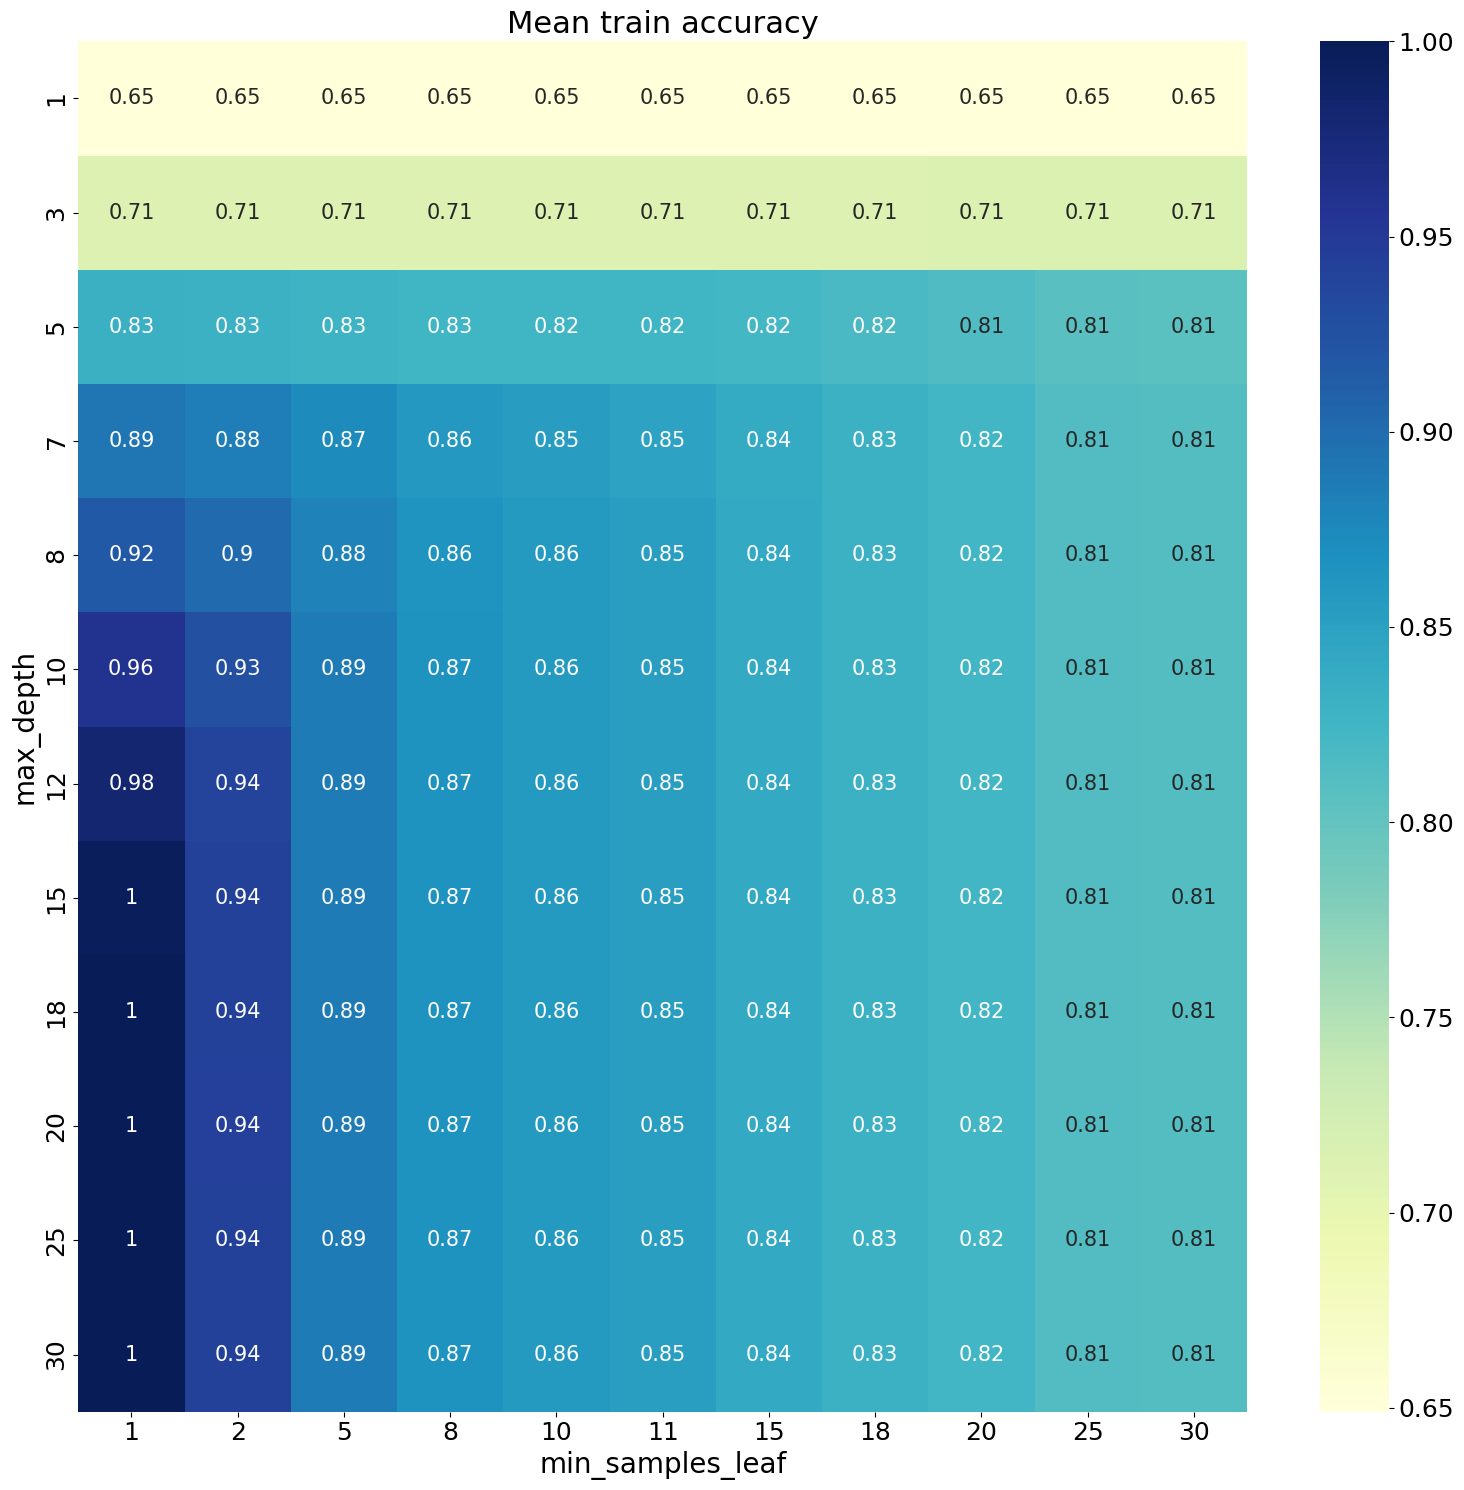

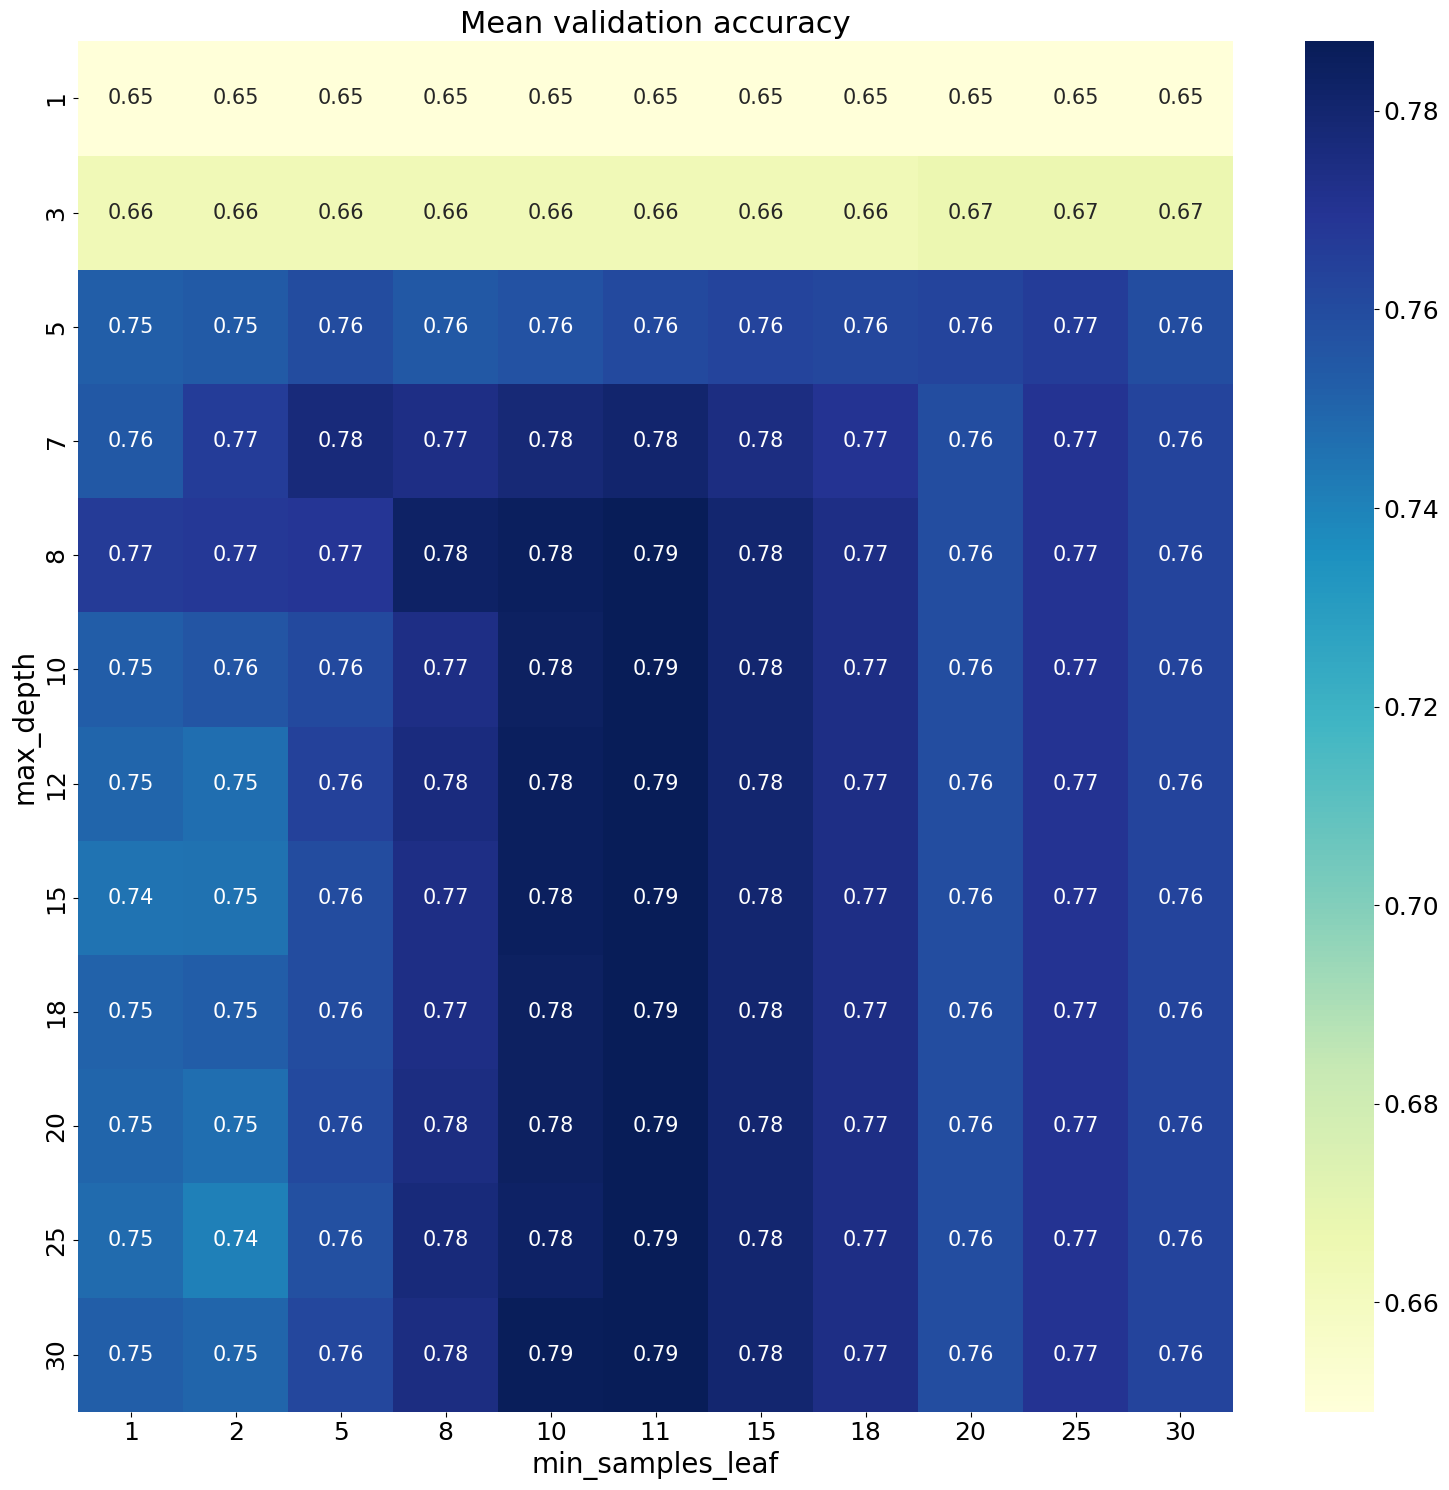

In [36]:
#Q6
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [1,3, 5, 7, 8 , 10, 12, 15, 18 ,20 ,25, 30    ],  # Hyperparameter range for max_depth
    'min_samples_leaf': [1, 2,5,  8 , 10 , 11 , 15 , 18, 20 ,25 , 30   ]  # Hyperparameter range for min_samples_leaf
}


dt = DecisionTreeClassifier()


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)


grid_search.fit(X,Y)

# Print the best parameters and the best validation score
print("Best parameters found (with 5-fold cross-validation): ", grid_search.best_params_)
print("Best validation accuracy with 5-fold CV: ", grid_search.best_score_)

train_accuracies = grid_search.cv_results_['mean_train_score'].reshape(len(param_grid['max_depth']), len(param_grid['min_samples_leaf']))

valid_accuracies = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['max_depth']), len(param_grid['min_samples_leaf']))


plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
sns.heatmap(train_accuracies, annot=True, cmap="YlGnBu", xticklabels=param_grid['min_samples_leaf'], yticklabels=param_grid['max_depth'] , annot_kws={"size": 15} )
plt.title('Mean train accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.tight_layout()
plt.show()


plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 2)
sns.heatmap(valid_accuracies, annot=True, cmap="YlGnBu", xticklabels=param_grid['min_samples_leaf'], yticklabels=param_grid['max_depth'], annot_kws={"size": 15})
plt.title('Mean validation accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.tight_layout()

# Show the plots
plt.show()



Test Accuracy: 0.828


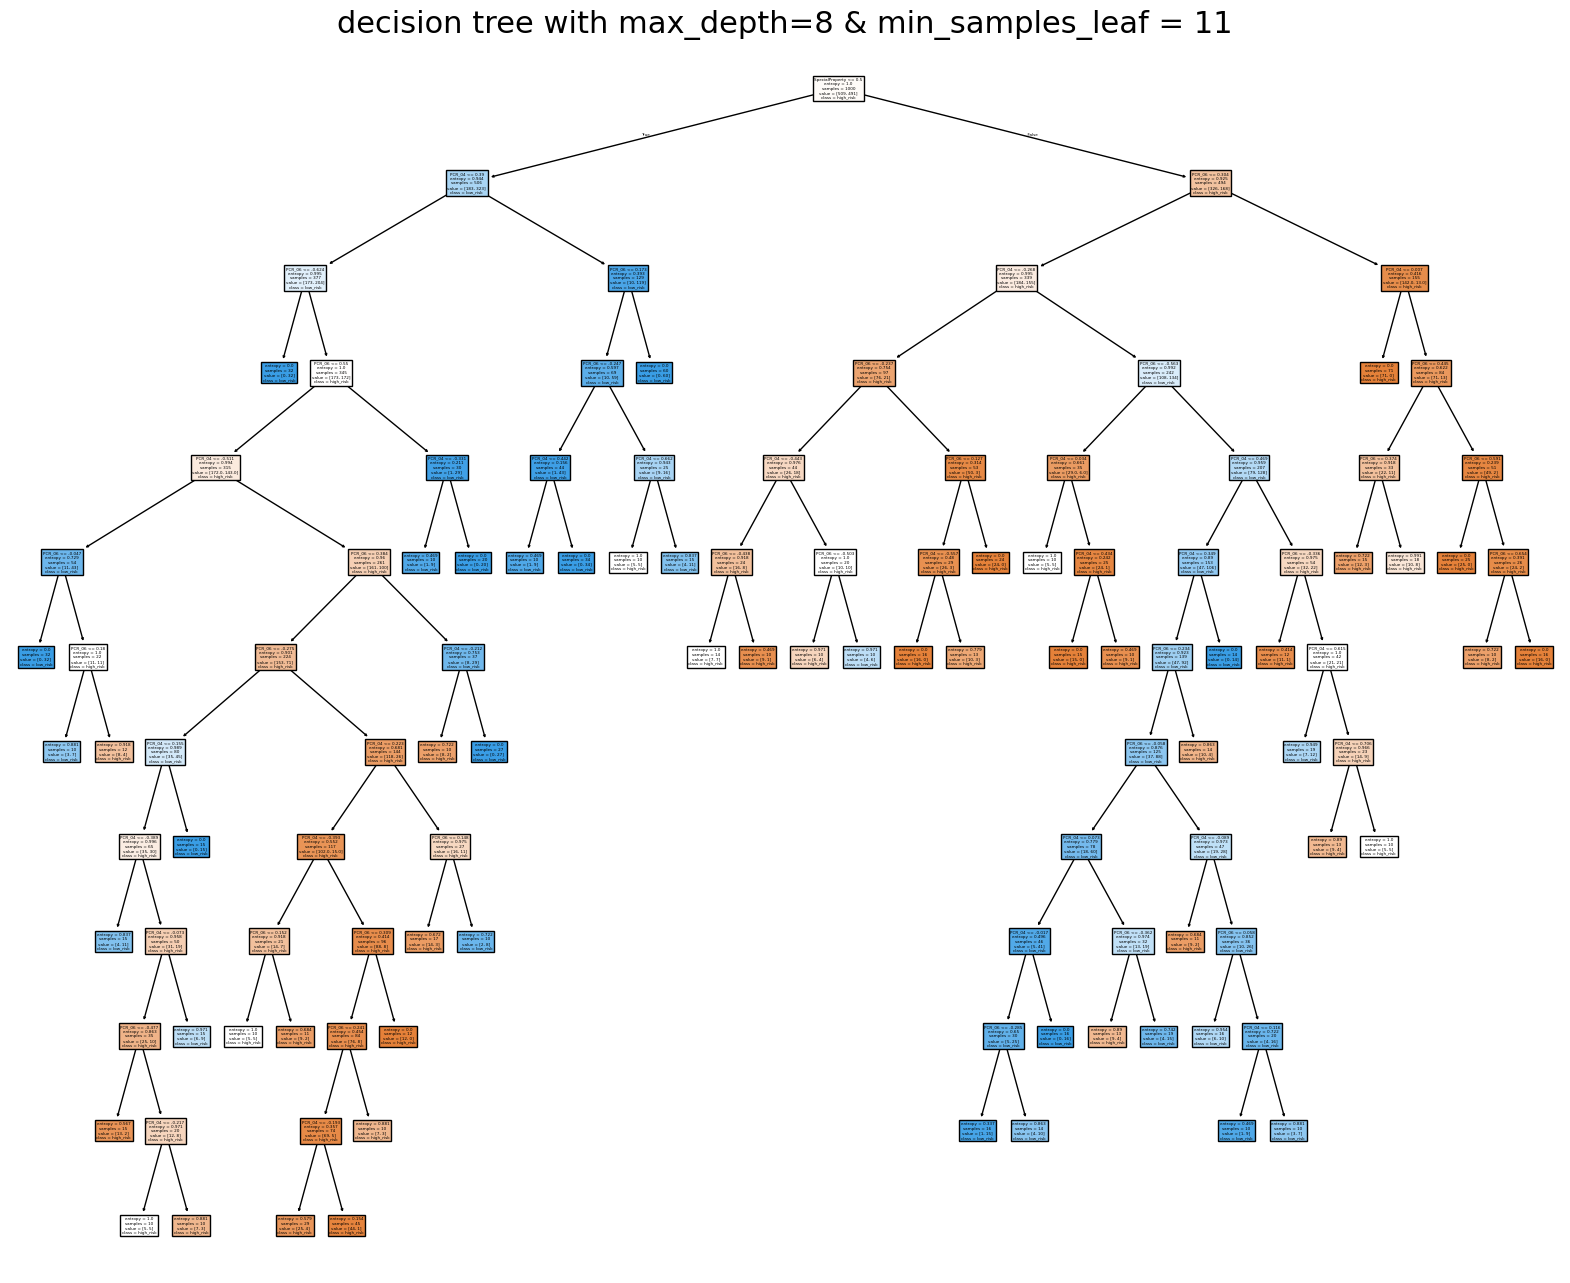

In [37]:
#Q8

X_test = test[['PCR_04', 'PCR_06', 'SpecialProperty']]  # Features
Y_test = test['risk']  # Target

DT = DecisionTreeClassifier(max_depth= 12 , min_samples_leaf=10 , criterion="entropy")
DT.fit(X, Y)

test_accuracy = DT.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)


plt.figure(figsize=(20, 16))
plot_tree(DT, filled=True, feature_names=X.columns, class_names=['high_risk', 'low_risk'])
plt.title('decision tree with max_depth=8 & min_samples_leaf = 11', fontsize=22)
plt.show()

In [38]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

from SoftSVM import SoftSVM

In [39]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ilya\AppData\Local\Temp\ipykernel_140992\2696906511.py:41: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel('$\delta$', fontsize=18)


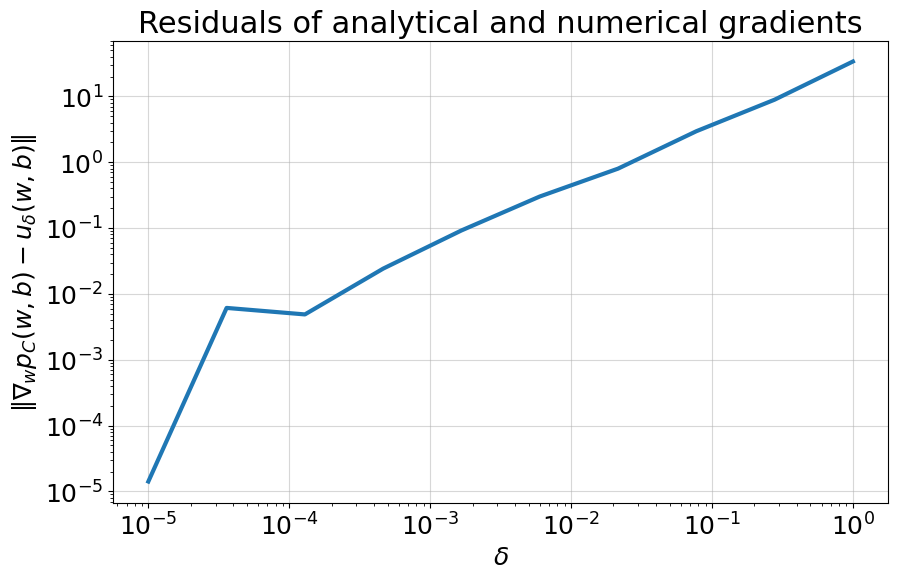

In [40]:
#Q9
compare_gradients(pcr18_train.to_numpy(), spread_train.to_numpy(), deltas=np.logspace(-5, 0, 10))

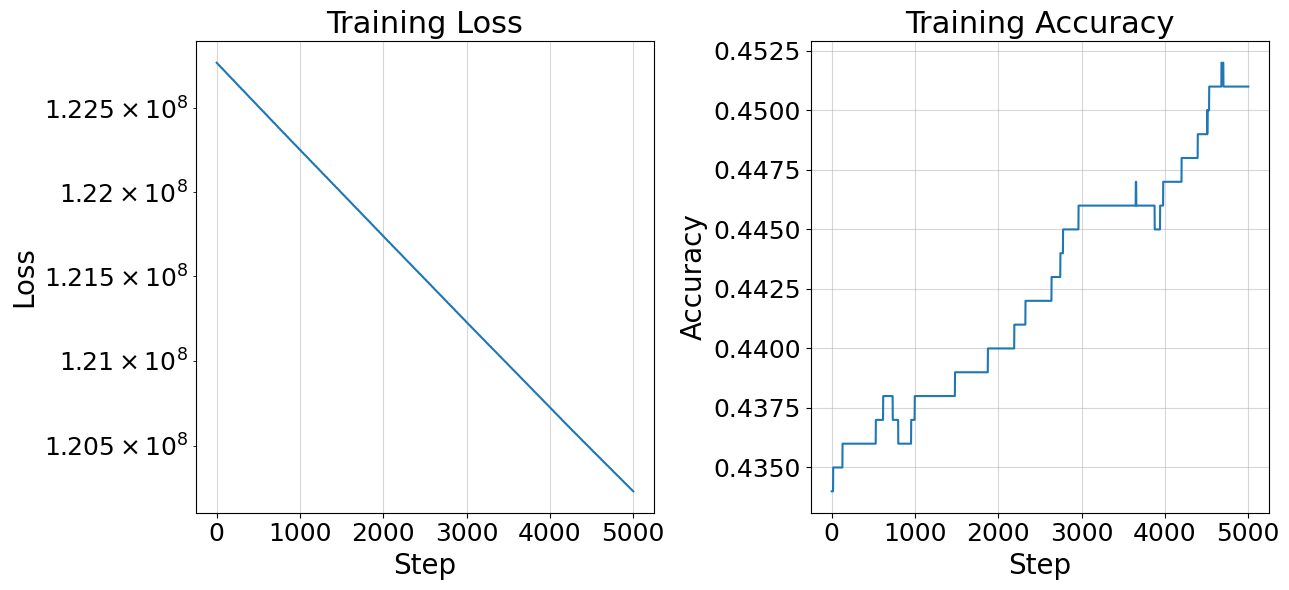

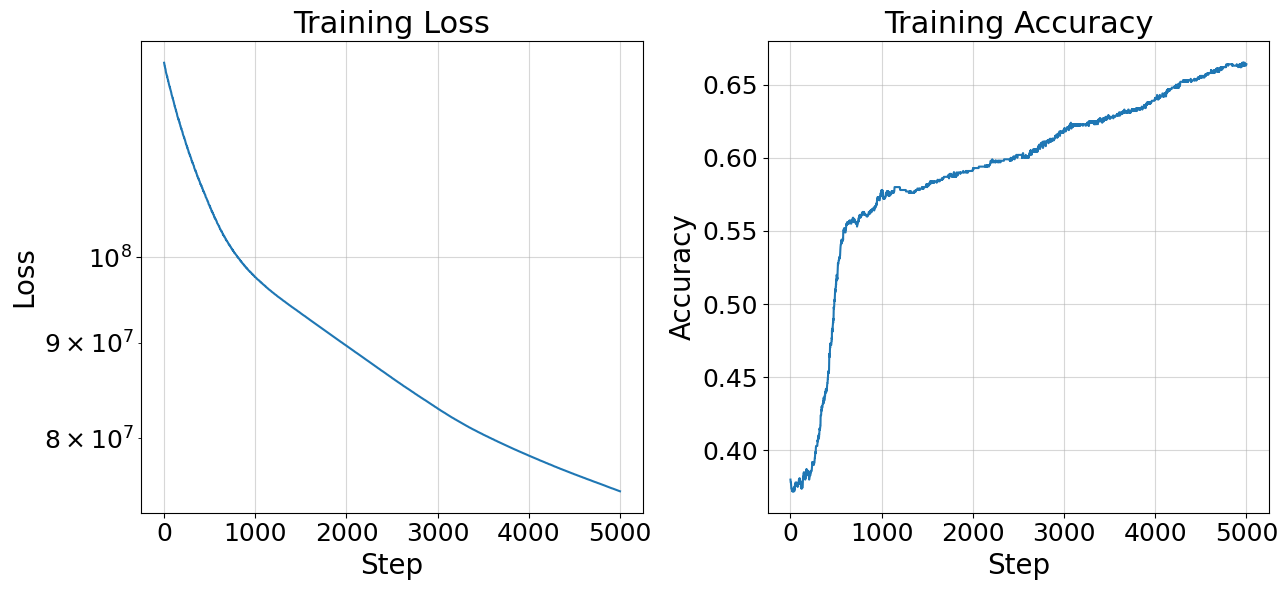

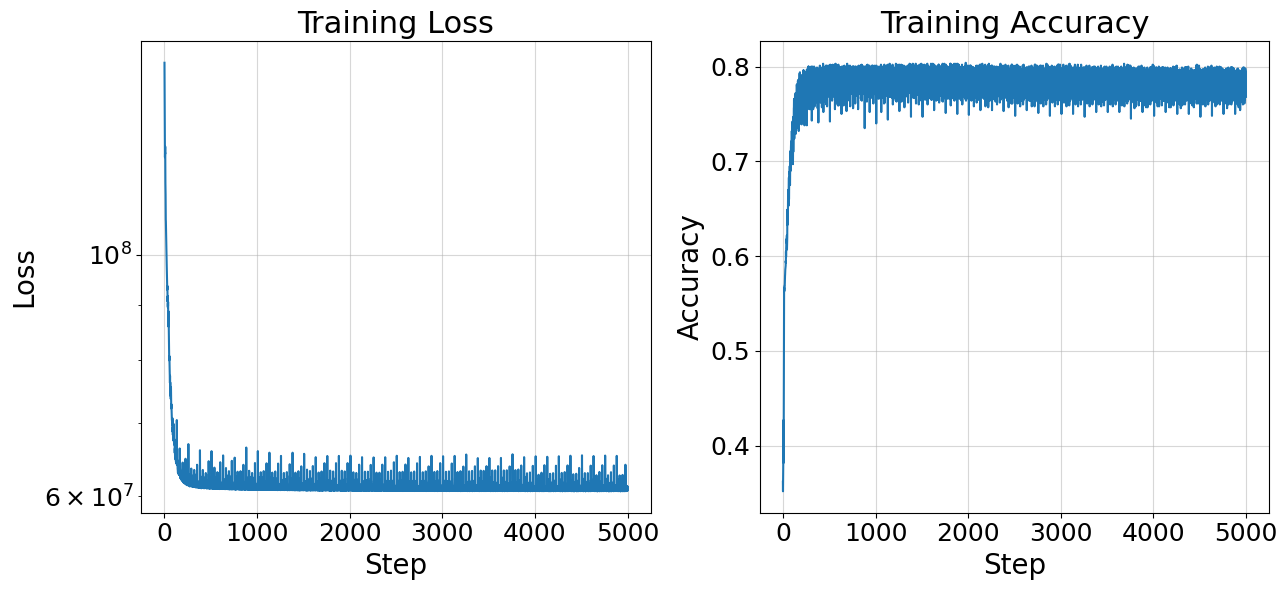

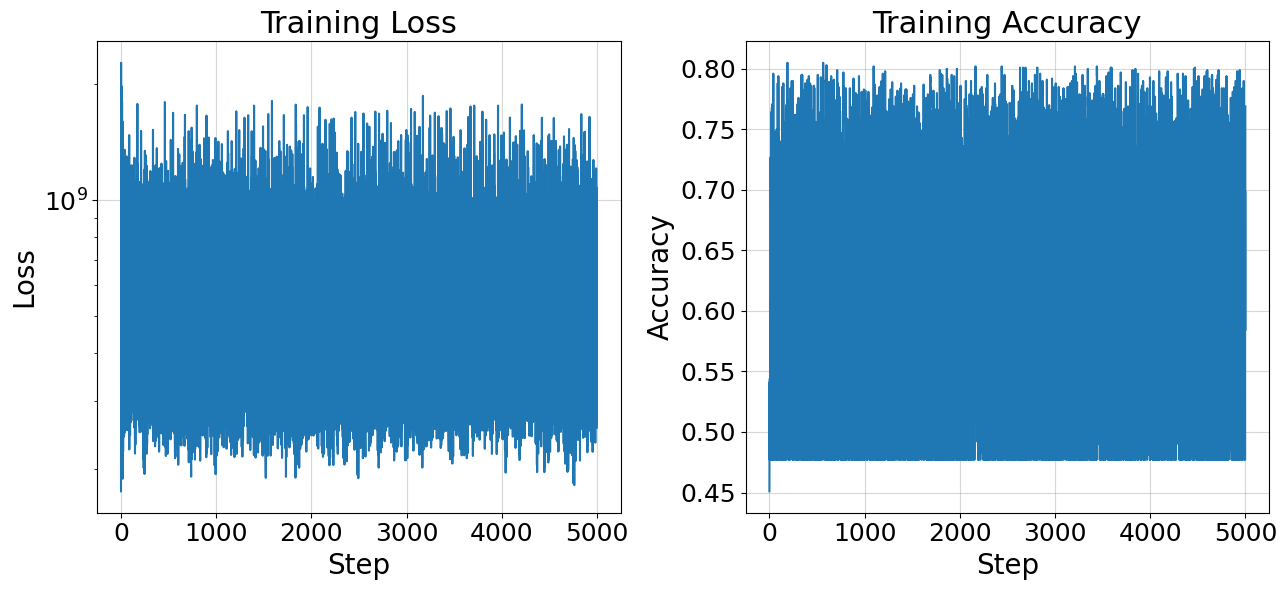

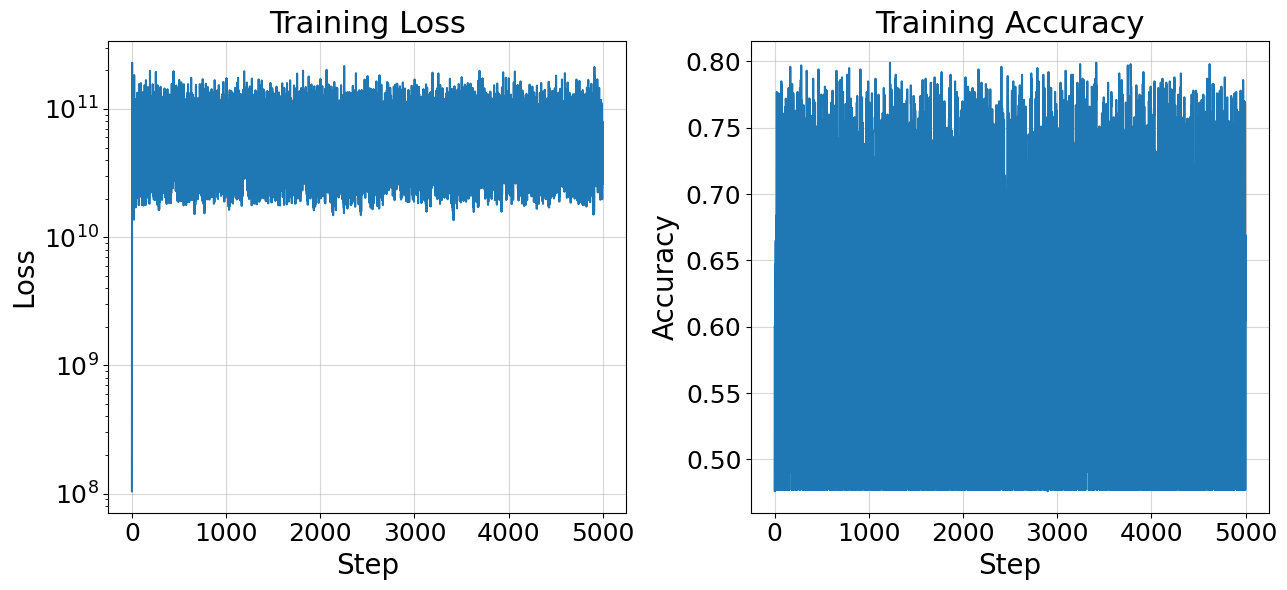

In [41]:
#Q11
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
C=1e5
for lr in np.logspace(-11, -3, 5):
    clf = SoftSVM(C=C, lr=lr)
    X_train_poly = PolynomialFeatures(degree=3,).fit_transform(pcr18_train.to_numpy())
    X_train_poly = MinMaxScaler(feature_range=(-1,1)).fit_transform(X_train_poly)
    losses, accuracies = clf.fit_with_logs(X_train_poly, spread_train.to_numpy(), max_iter=5000)
    plt.figure(figsize=(13, 6))
    plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Training Loss")
    plt.semilogy(losses), plt.xlabel("Step"), plt.ylabel("Loss")
    plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Training Accuracy")
    plt.plot(accuracies), plt.xlabel("Step"), plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()

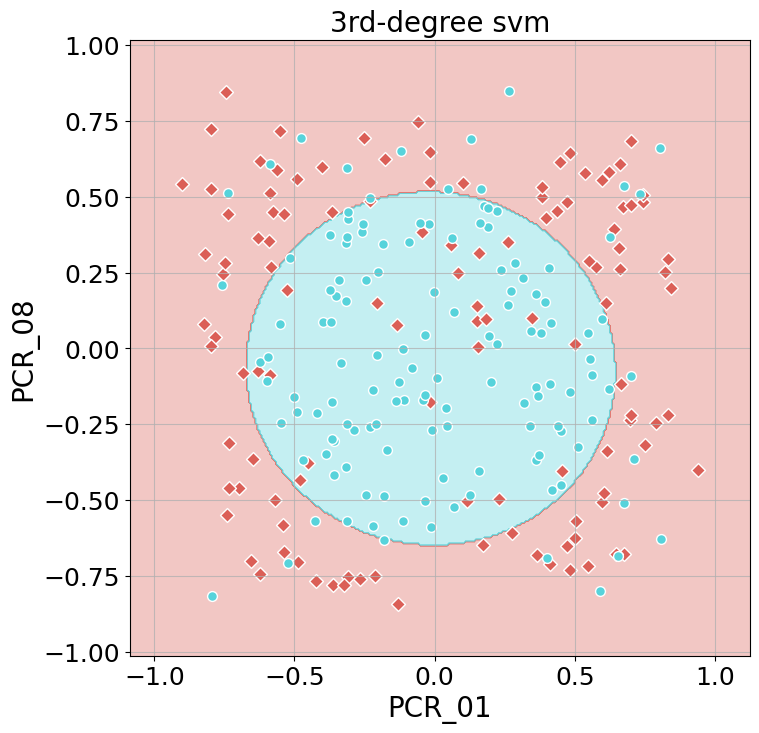

Training accuracy:
0.792
Test accuracy:
0.804


In [42]:
#Q12
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)), ('scaler', MinMaxScaler()), ('SVM', SoftSVM(C=1e5, lr=1.e-07))])
svm_clf.fit(pcr18_train.to_numpy(), spread_train.to_numpy())

visualize_clf(svm_clf, pcr18_test, spread_test, '3rd-degree svm', 'PCR_01', 'PCR_08')
print("Training accuracy:")
print(svm_clf.score(pcr18_train.to_numpy(), spread_train.to_numpy()))
print("Test accuracy:")
print(svm_clf.score(pcr18_test.to_numpy(), spread_test.to_numpy()))


C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


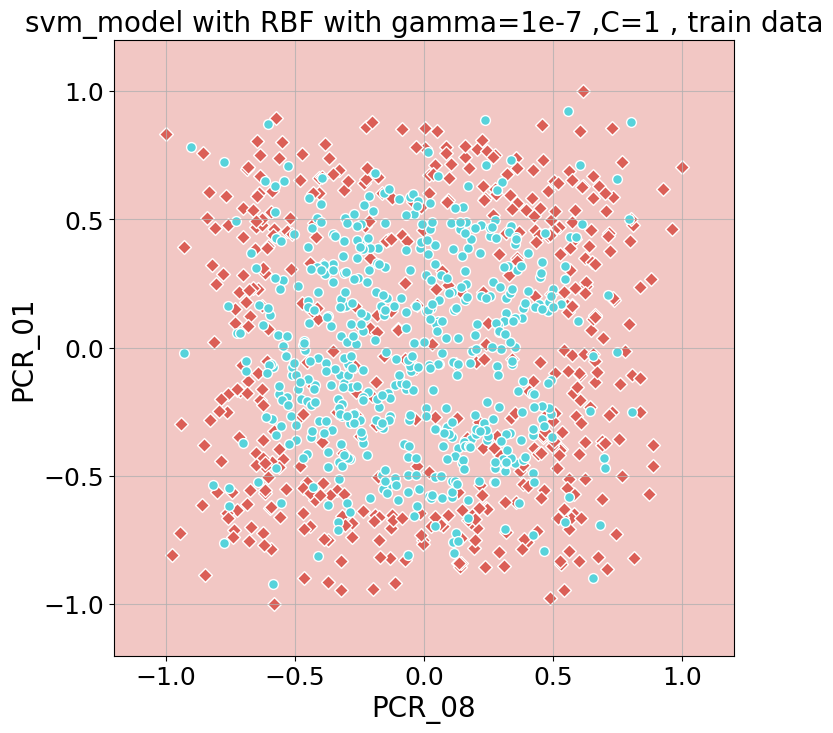

C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


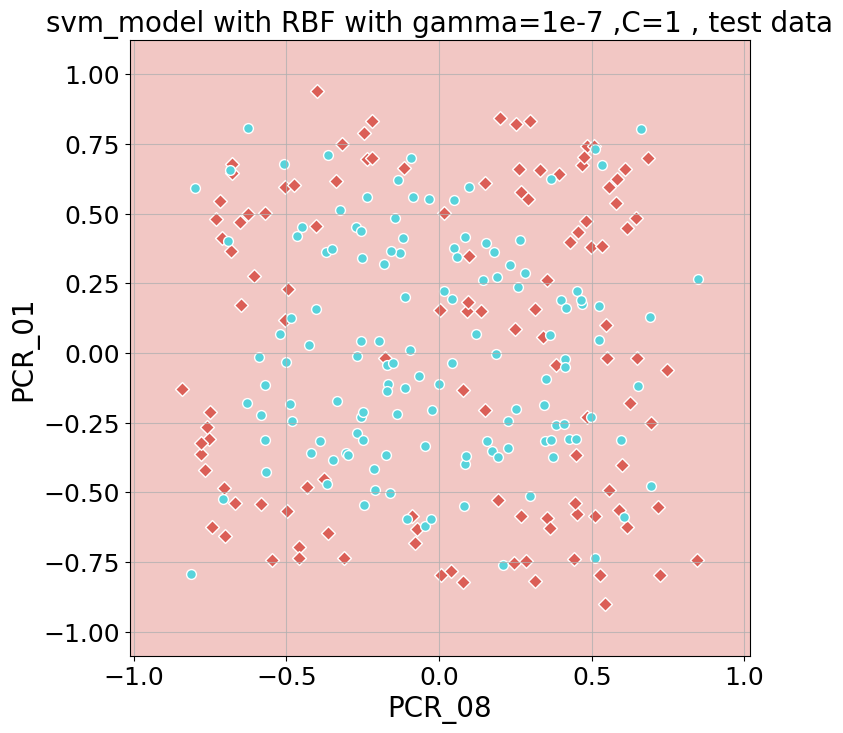

Accuracy test: 0.53
Accuracy train: 0.52


In [43]:
#Part 4
#Q14
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train=train[['PCR_08' , 'PCR_01']]
Y_train = train['spread']
X_test=test[['PCR_08' , 'PCR_01']]
Y_test = test['spread']

model = SVC(kernel='rbf', C=1.0, gamma=1e-7)
model.fit(X_train, Y_train)
visualize_clf(model,train[['PCR_08' , 'PCR_01']], train['spread'],
            'svm_model with RBF with gamma=1e-7 ,C=1 , train data', 'PCR_08', 'PCR_01')
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(Y_test, y_pred)
visualize_clf(model,test[['PCR_08' , 'PCR_01']], test['spread'],
            'svm_model with RBF with gamma=1e-7 ,C=1 , test data', 'PCR_08', 'PCR_01')
print(f"Accuracy test: {accuracy_test:.2f}")

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_pred_train)
print(f"Accuracy train: {accuracy_train:.2f}")



C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


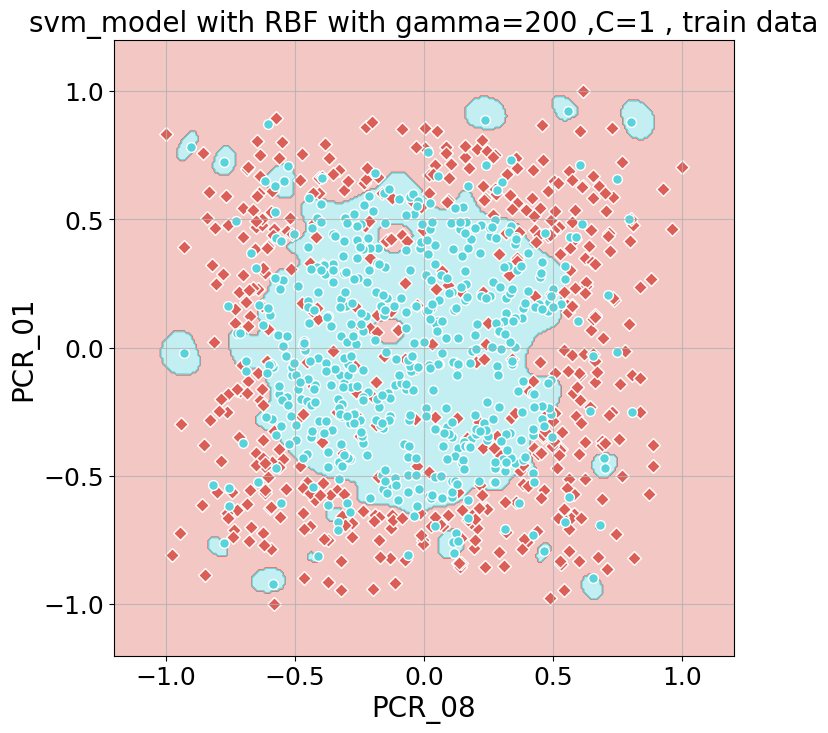

C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


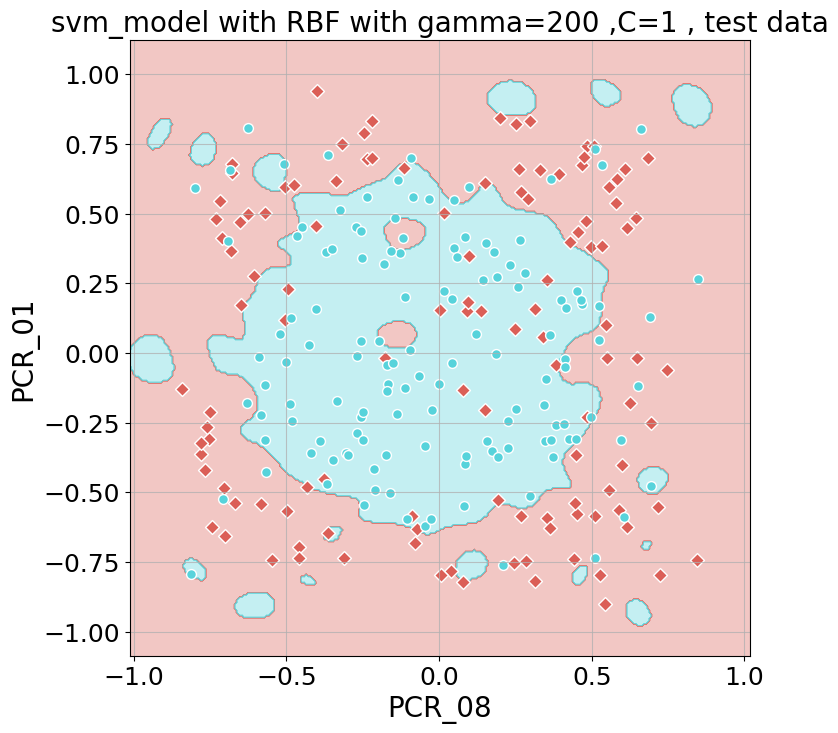

Accuracy test: 0.80
Accuracy train: 0.84


In [44]:
#Q15
X_train=train[['PCR_08' , 'PCR_01']]
Y_train = train['spread']
X_test=test[['PCR_08' , 'PCR_01']]
Y_test = test['spread']

model = SVC(kernel='rbf', C=1.0, gamma=200)
model.fit(X_train, Y_train)
visualize_clf(model,train[['PCR_08' , 'PCR_01']], train['spread'],
            'svm_model with RBF with gamma=200 ,C=1 , train data', 'PCR_08', 'PCR_01')
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(Y_test, y_pred)
visualize_clf(model,test[['PCR_08' , 'PCR_01']], test['spread'],
            'svm_model with RBF with gamma=200 ,C=1 , test data', 'PCR_08', 'PCR_01')
print(f"Accuracy test: {accuracy_test:.2f}")

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_pred_train)
print(f"Accuracy train: {accuracy_train:.2f}")



C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


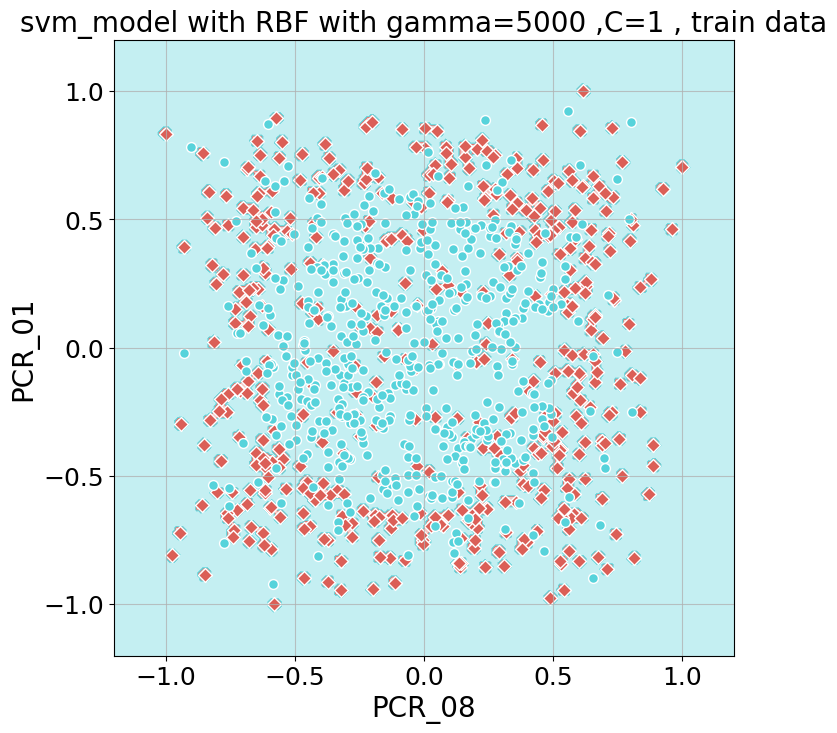

C:\Users\Ilya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


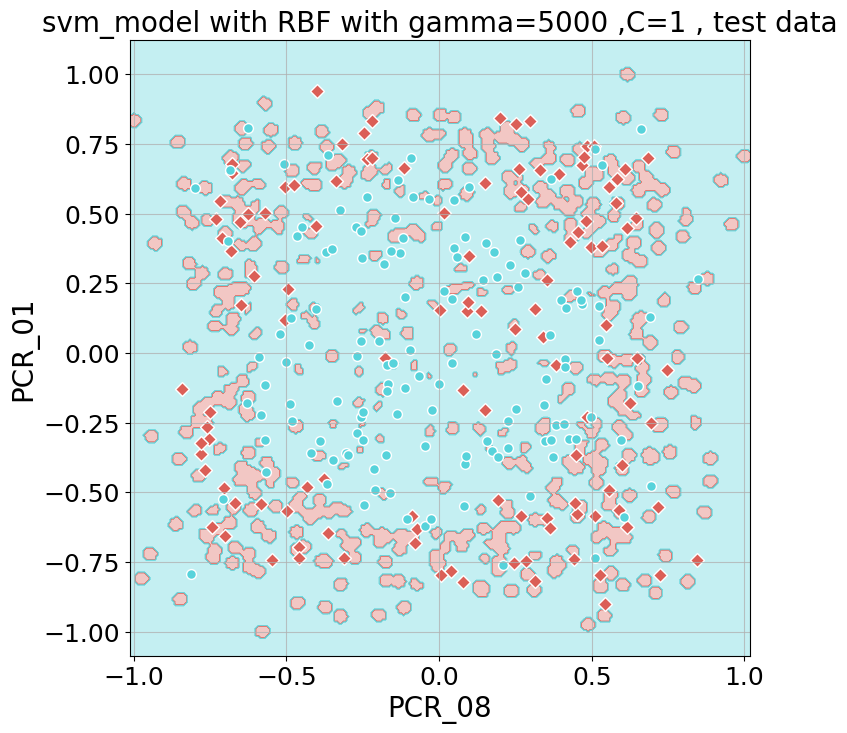

Accuracy test: 0.60
Accuracy train: 0.99


In [45]:
#Q16
X_train=train[['PCR_08' , 'PCR_01']]
Y_train = train['spread']
X_test=test[['PCR_08' , 'PCR_01']]
Y_test = test['spread']

model = SVC(kernel='rbf', C=1.0, gamma=5000)
model.fit(X_train, Y_train)
visualize_clf(model,train[['PCR_08' , 'PCR_01']], train['spread'],
            'svm_model with RBF with gamma=5000 ,C=1 , train data', 'PCR_08', 'PCR_01')
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(Y_test, y_pred)
visualize_clf(model,test[['PCR_08' , 'PCR_01']], test['spread'],
            'svm_model with RBF with gamma=5000 ,C=1 , test data', 'PCR_08', 'PCR_01')
print(f"Accuracy test: {accuracy_test:.2f}")

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(Y_train, y_pred_train)
print(f"Accuracy train: {accuracy_train:.2f}")


